In [92]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [93]:
data = pd.read_csv("data.csv")

In [94]:
data["busi_date"] = pd.to_datetime(data["busi_date"])
data["industry"] = data["industry"].str.replace(" ","")
data["industry"] = data["industry"].str.lstrip("ind")
data["industry"] = data["industry"].str.zfill(2)
data["industry"] = "ind"+ data["industry"]

In [95]:
data = pd.DataFrame(data.groupby(["busi_date","holding_days"])["mktval"].sum())
data = data.reset_index()
data["busi_date"] = data["busi_date"].dt.date

In [96]:
data["holding_days*mktval"] = data["holding_days"] * data["mktval"]

In [97]:
data = data.groupby(["busi_date"])["mktval","holding_days*mktval"].sum()

In [98]:
final = pd.DataFrame(index = data.index)
final["Results"] = data["holding_days*mktval"] / data["mktval"]

In [99]:
final

,Results
busi_date,
2023-05-04,36.160622
2023-05-05,36.626302
2023-05-08,35.970857
2023-05-09,38.795670
2023-05-10,38.139004
2023-05-11,40.284061
2023-05-12,39.799263
2023-05-15,40.242572
2023-05-16,42.251218


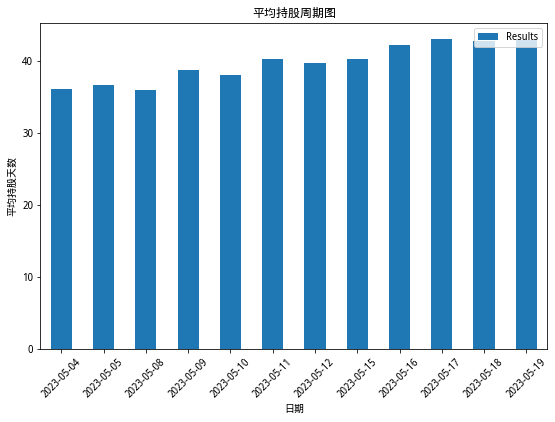

In [100]:
plt.figure(figsize=(20,6))
ax=plt.subplot(121)
final.plot.bar(ax=ax)
ax.set_xticklabels(data.index, rotation = 45)
ax.set(title="平均持股周期图", xlabel='日期', ylabel='平均持股天数')
ax.legend(loc = "upper right", ncol = 6)
